<a href="https://colab.research.google.com/github/tanisha-27/AI/blob/master/EXP_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #visualisation
import seaborn as sns #advanced visualisation
import matplotlib as mpl
 
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2)
 
print('Data downloaded and read into a dataframe!')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data downloaded and read into a dataframe!


In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


### Basic Preprocessing

In [ ]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], inplace= True, axis = 'columns')

In [ ]:
years = range(1980,2014)
df_can['Total'] = df_can.sum(axis = 'columns')
df_can.rename(columns = {"OdName":"Country","AreaName":"Continent","RegName":'Region'}, inplace = True)
df_can.set_index('Country', inplace= True)

In [ ]:
df_continents = df_can.groupby('Continent', axis = 'index').sum()

In [ ]:
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142



### Q1. By Continent-region pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.




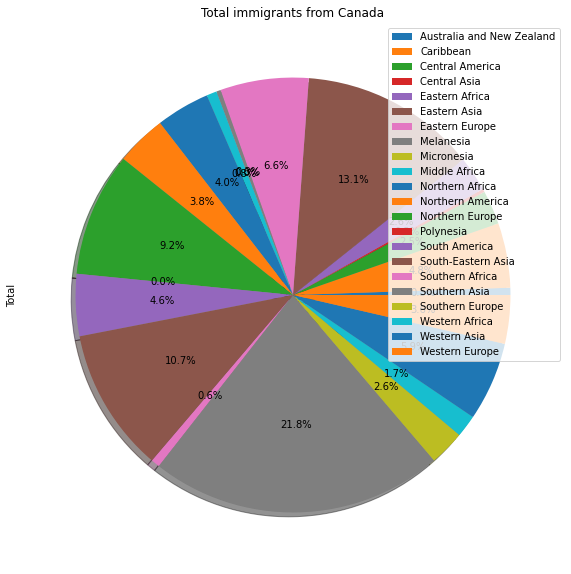

In [ ]:
explodelist = [0,0,0.2,0,0,0]
df_con_region = df_can.groupby("Region", axis='rows').sum()
df_con_region['Total'].plot(kind = 'pie', figsize = (10,10), autopct = '%1.1f%%', shadow = True, labels = None)
plt.title("Total immigrants from Canada")
plt.legend(labels = df_con_region.index, loc = 'upper right' )

### Q2.By Development-status pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows

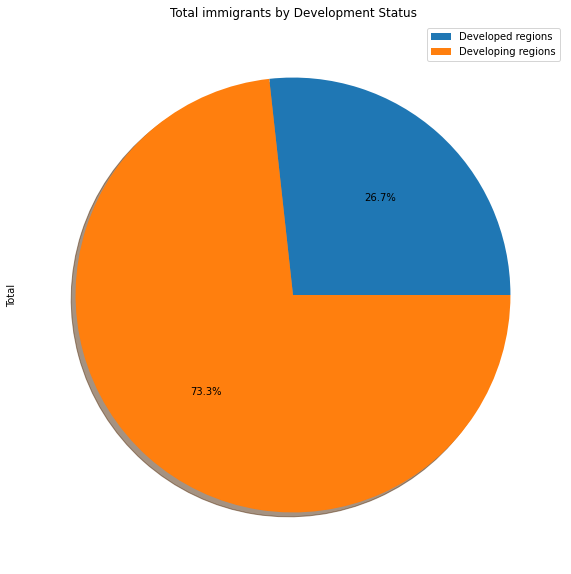

In [ ]:
df_dev = df_can.groupby('DevName', axis = 'rows').sum()
df_dev['Total'].plot(kind = 'pie', figsize = (10,10), autopct = '%1.1f%%', shadow = True, labels = None)
plt.title("Total immigrants by Development Status")
plt.legend(labels = df_dev.index, loc = 'upper right' )

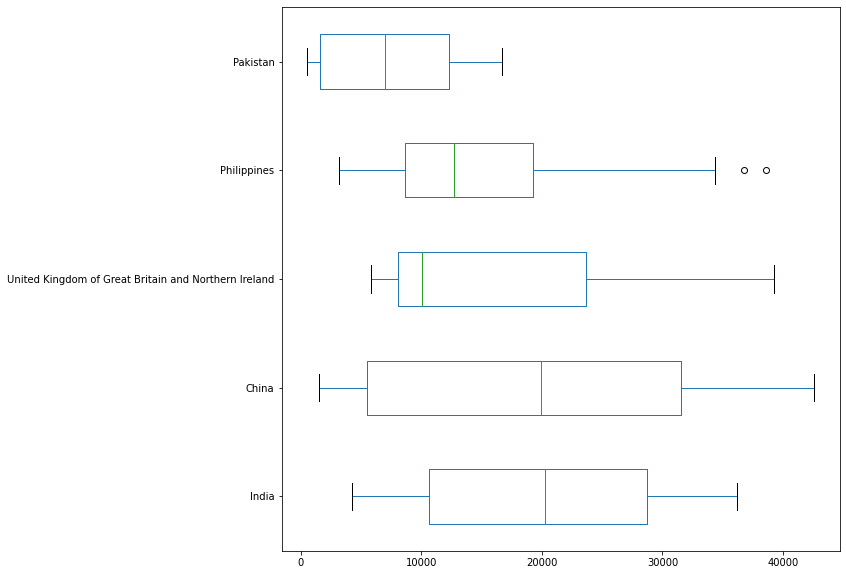

In [ ]:
df_can.sort_values(by = 'Total', axis = 'index', inplace = True, ascending = False)
df_top5 = df_can.head(5)
df_top5 = df_top5[years]
df_top5 = df_top5.transpose()
df_top5.plot(kind = 'box', figsize = (10,10), vert = False)

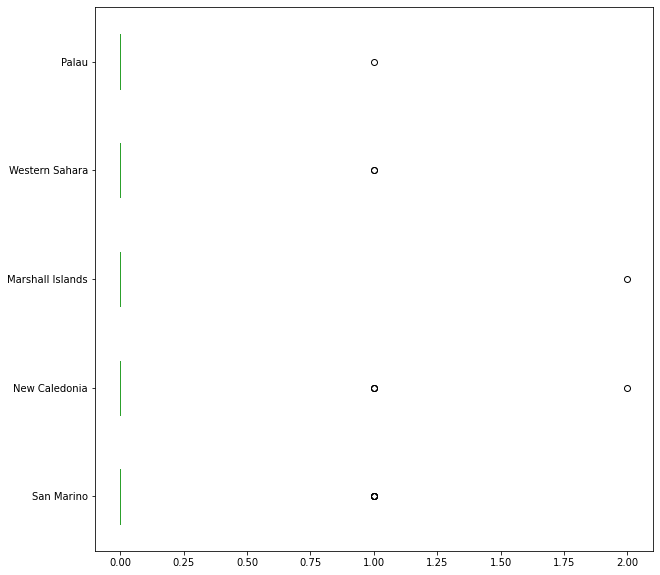

In [ ]:
df_can.sort_values(by = 'Total', axis = 'index', inplace = True, ascending = False)
df_bot5 = df_can.tail(5)
df_bot5 = df_bot5[years]
df_bot5 = df_bot5.transpose()
df_bot5.plot(kind = 'box', figsize = (10,10), vert = False)

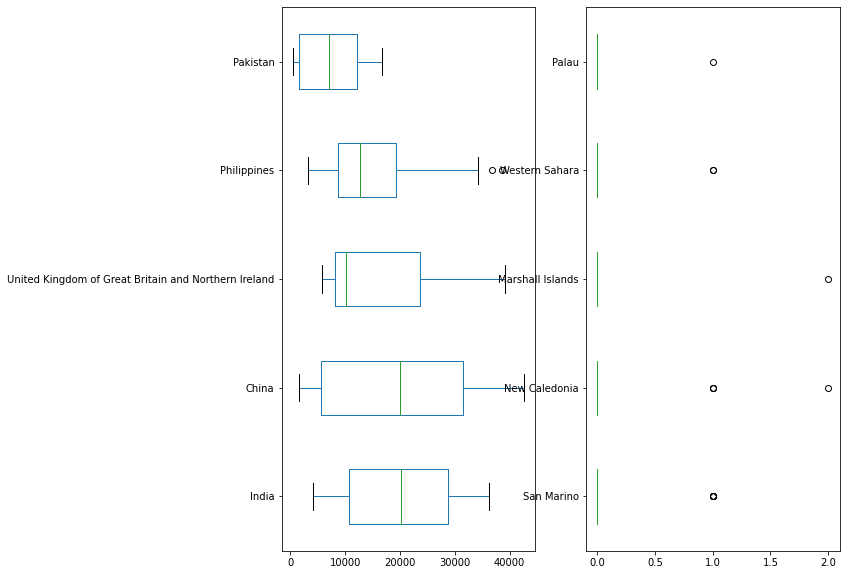

In [ ]:
#using subplots
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df_top5.plot(kind = 'box', figsize = (10,10), vert = False, ax = ax1)

df_bot5.plot(kind = 'box', figsize = (10,10), vert = False, ax = ax2)

### Q3. Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania

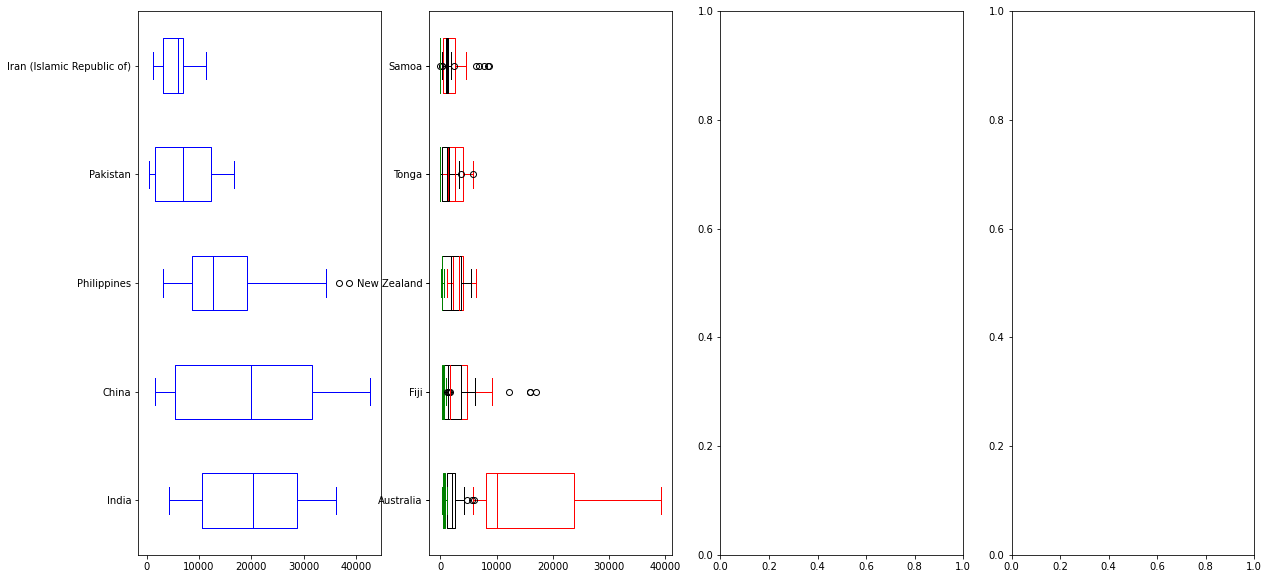

In [ ]:
asia = df_can[df_can['Continent']=='Asia'].head(5)
asia = asia[years].transpose()
europe = df_can[df_can['Continent']=='Europe'].head(5)
europe = europe[years].transpose()
africa = df_can[df_can['Continent']=='Africa'].head(5)
africa = africa[years].transpose()
oceania = df_can[df_can['Continent']=='Oceania'].head(5)
oceania = oceania[years].transpose()
fig = plt.figure()

ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)

asia.plot(kind="box",figsize=(20,10),vert=False,color='blue', ax=ax0)
europe.plot(kind="box",figsize=(20,10),vert=False,color='red', ax=ax1)
africa.plot(kind="box",figsize=(20,10),vert=False,color='black', ax=ax1)
oceania.plot(kind="box",figsize=(20,10),vert=False,color='green', ax=ax1)

Q4. Identify countries which are outliers based on total migration

In [ ]:
for country in df_can.index:
  df = df_can.loc[[country], years].transpose().describe()
  Q1 = df.loc['25%']
  Q3 = df.loc['75%']
  IQR=Q3-Q1
  Outlier1 = Q3+1.5*IQR
  Outlier2 = Q1 - 1.5*IQR
  print(Outlier1)
  print(Outlier2)
  print("----")

Country
India    55792.125
dtype: float64
Country
India   -16454.875
dtype: float64
----
Country
China    70652.125
dtype: float64
Country
China   -33570.875
dtype: float64
----
Country
United Kingdom of Great Britain and Northern Ireland    47095.375
dtype: float64
Country
United Kingdom of Great Britain and Northern Ireland   -15315.625
dtype: float64
----
Country
Philippines    35128.0
dtype: float64
Country
Philippines   -7216.0
dtype: float64
----
Country
Pakistan    28298.875
dtype: float64
Country
Pakistan   -14474.125
dtype: float64
----
Country
United States of America    12313.5
dtype: float64
Country
United States of America    1693.5
dtype: float64
----
Country
Iran (Islamic Republic of)    12745.0
dtype: float64
Country
Iran (Islamic Republic of)   -2751.0
dtype: float64
----
Country
Sri Lanka    9307.625
dtype: float64
Country
Sri Lanka   -1163.375
dtype: float64
----
Country
Republic of Korea    11054.25
dtype: float64
Country
Republic of Korea   -2787.75
dtype: float64


Q5. Plot the bubble plot for Norway, Denmark, Finland

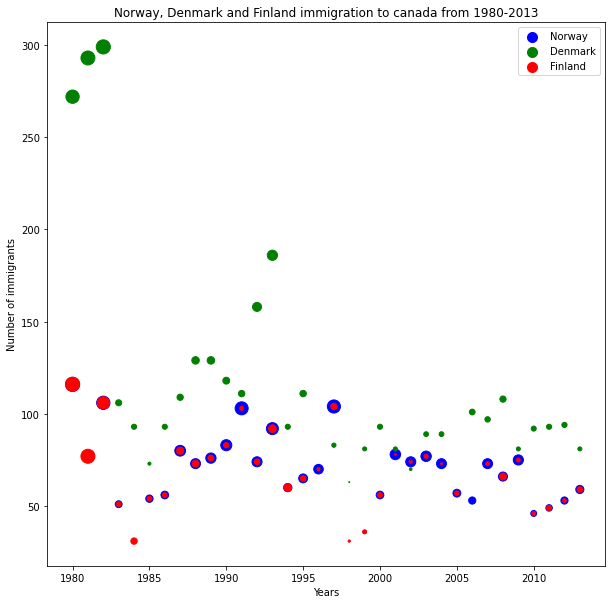

In [ ]:
df = df_can.loc[['Norway','Denmark', 'Finland'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)

normnor = (df['Norway'] - df['Norway'].min()) / (df['Norway'].max() - df['Norway'].min())
normden = (df['Denmark'] - df['Denmark'].min()) / (df['Denmark'].max() - df['Denmark'].min())
normfin = (df['Finland'] - df['Finland'].min()) / (df['Finland'].max() - df['Finland'].min())


ax0 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='blue',
    s = normnor*200
)

ax1 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='green',
    ax=ax0,
    s = normden*200
)
ax2 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='red',
    ax=ax0,
    s = normfin*200
)


ax0.set_title("Norway, Denmark and Finland immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['Norway', 'Denmark', 'Finland'], loc='upper right')

### Waffle Charts

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [ ]:
dfindopakchina = df_can.loc[['India', 'Pakistan', 'China'], :]

dfindopakchina

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [ ]:
df_dsn = df_can.loc[['India', 'Pakistan', 'China'], :]

categories = df_dsn.index.values

value = df_dsn['Total']

#create a waffle chart

width=40
height=10

colormap = plt.cm.coolwarm

Total number of tiles is 400
India: 174
Pakistan: 61
China: 166


<Figure size 432x288 with 0 Axes>

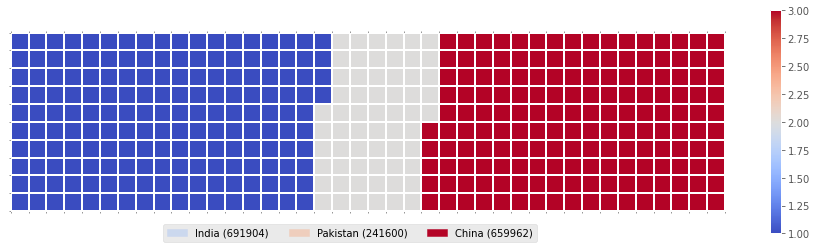

In [ ]:
create_waffle_chart(categories, value, height, width, colormap)

### Word clouds

In [ ]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!
File downloaded and saved!


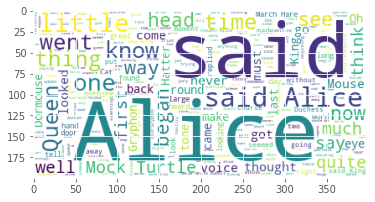

In [ ]:
#step1 - preprocessing

stopwordsrem = set(STOPWORDS)

#step 2-wordcloud object

alicewc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stopwordsrem
)


#step3 - use the object to call function

alicewc.generate(alice_novel)

# step 4 - display

plt.imshow(alicewc)
plt.show()

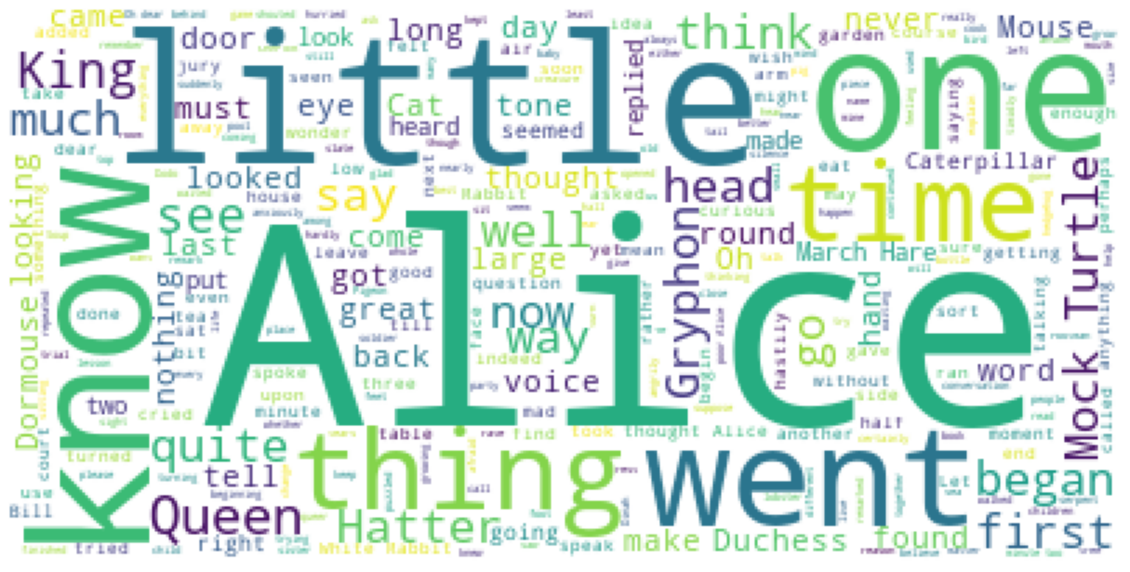

In [ ]:
#step1 - preprocessing

stopwordsrem = set(STOPWORDS)
stopwordsrem.add('said')


#step 2-wordcloud object

alicewc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stopwordsrem
)


#step3 - use the object to call function

alicewc.generate(alice_novel)

# step 4 - display
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.imshow(alicewc)
plt.axis('off')
plt.show()

### Maps

In [ ]:
import numpy as np

import pandas as pd

import folium

In [ ]:
map1 = folium.Map()
map1

In [ ]:
map2 = folium.Map(location=[37.22, -122.16], zoom_start=12)
map2

In [ ]:
map3 = folium.Map(location=[56.130, -106.35], zoom_start=10, tiles='Stamen Toner')
map3

In [ ]:
map4 = folium.Map(location=[56.130, -106.35], zoom_start=5, tiles='Stamen Terrain')
map4

In [ ]:
#Find coordinates of mumbai and plot on maps
mumbai = folium.Map(location=[19.0760, 72.877], zoom_start=12)
mumbai

In [ ]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

df_incidents.head()

df_incidents.shape

Dataset downloaded and read into a pandas dataframe!


(150500, 13)

### Markers with maps

In [ ]:
#step1 - obtain dataset
df1 = df_incidents.iloc[0:100,:]

#step 2 - map
lat = 37.77
longs = -122.42

map1 = folium.Map(location=[lat, longs], zoom_start=12)


for lat, longs, labels in zip(df1.Y, df1.X, df1.Category):
  folium.CircleMarker(
      [lat, longs],
      radius=5,
      color='yellow',
      fill=True,
      popup=labels,
      fill_color='blue',
      fill_opacity=0.6
  ).add_to(map1)

map1

In [ ]:
#step1 - obtain dataset
df1 = df_incidents.iloc[0:100,:]

#step 2 - map
lat = 37.77
longs = -122.42

map1 = folium.Map(location=[lat, longs], zoom_start=12)

#cluster
from folium import plugins
clust = plugins.MarkerCluster().add_to(map1)


for lat, longs, labels in zip(df1.Y, df1.X, df1.Category):
  folium.CircleMarker(
      [lat, longs],
      radius=5,
      color='yellow',
      fill=True,
      popup=labels,
      fill_color='blue',
      fill_opacity=0.6
  ).add_to(clust)

map1

### Choropleth map

In [ ]:
df_can.reset_index(inplace=True)

In [ ]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [ ]:
worldmap = folium.Map(location=[0,0], zoom_start=2, tiles='Stamen Watercolor')
worldmap

world_geo = r'world_countries.json'

worldmap.choropleth(
    geo_data = world_geo,
    data=df_can,
    columns=['Country','Total'],
    key_on='feature.properties.name',
    legend='Immigration to Canada',
    fill_color='YlOrRd'
 )

worldmap

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
worldmap = folium.Map(location=[0,0], zoom_start=2, tiles='Stamen Watercolor')
worldmap

world_geo = r'world_countries.json'


scale = np.linspace(df_can['Total'].min(), df_can['Total'].max(), 6, dtype=int)
scale = scale.tolist()
scale[-1] = scale[-1]+1

worldmap.choropleth(
    geo_data = world_geo,
    data=df_can,
    columns=['Country','Total'],
    key_on='feature.properties.name',
    legend='Immigration to Canada',
    fill_color='YlOrRd',
    threshold_scale=scale
 )

worldmap

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
